In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"D:\Data MLE\diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Balance checking

In [6]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
data.shape

(768, 9)

<Axes: >

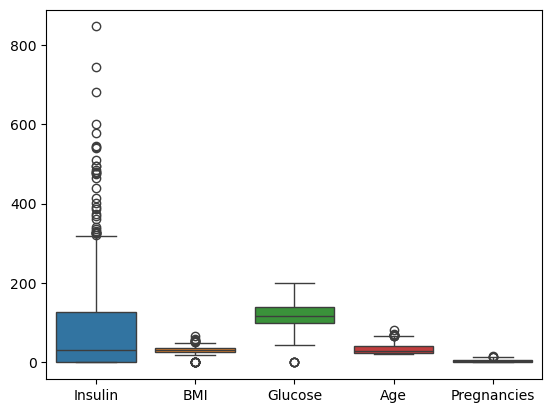

In [8]:
import seaborn as sns
sns.boxplot(data=data[['Insulin', 'BMI', 'Glucose','Age','Pregnancies']])

**Removing Outliers**

In [9]:
columns = ['Insulin', 'BMI', 'Glucose','Age','Pregnancies']

In [10]:
df = data.copy()

In [11]:
def outlier_removal(data, column):
    Q1 = data[column].quantile(0.25)
    Q3= data[column].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    return data[(data[column]>=lower_bound)&(data[column]<=upper_bound)]
for col in columns:
    df = outlier_removal(df, col)

<Axes: >

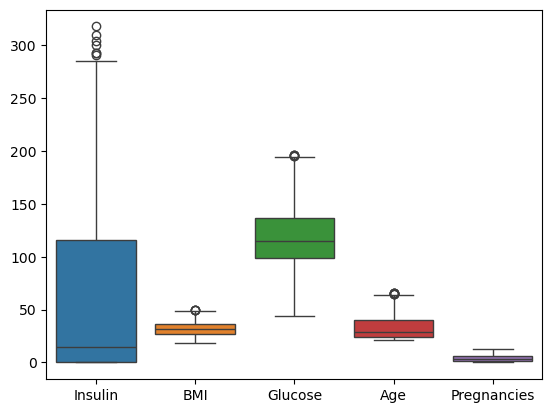

In [12]:
sns.boxplot(data = df[columns])

In [13]:
df.shape

(695, 9)

Train-Test split

In [14]:
X = df.drop(['Outcome'], axis=1)
y = df.Outcome


In [15]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)
X_scaled

array([[ 0.67362672,  0.97994814,  0.13032796, ...,  0.23332213,
         0.5299687 ,  1.56004777],
       [-0.84838424, -1.18248657, -0.19864758, ..., -0.84527173,
        -0.35604537, -0.16412622],
       [ 1.2824311 ,  2.18130076, -0.30830609, ..., -1.3537517 ,
         0.67442751, -0.07338022],
       ...,
       [ 0.36922453,  0.05319041,  0.13032796, ..., -0.90690567,
        -0.69632613, -0.25487222],
       [-0.84838424,  0.22481221, -0.52762312, ..., -0.3059748 ,
        -0.36246576,  1.28780977],
       [-0.84838424, -0.90789168,  0.02066945, ..., -0.25974935,
        -0.47161242, -0.89009421]])

In [16]:
from sklearn.model_selection import train_test_split
X_scalar_train, X_scalar_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=20)

In [17]:
X_scalar_train.shape

(556, 8)

In [18]:
X_scalar_test.shape

(139, 8)

In [19]:
y_train.value_counts()

Outcome
0    366
1    190
Name: count, dtype: int64

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5)
scores

array([0.65467626, 0.64028777, 0.68345324, 0.74100719, 0.69784173])

In [21]:
scores.mean()

0.6834532374100719

In [22]:
model = DecisionTreeClassifier()
model.fit(X_scalar_train, y_train)

DecisionTreeClassifier()

In [23]:
model.score(X_scalar_test,y_test)

0.7194244604316546

In [24]:
from sklearn.ensemble import BaggingClassifier
bag_model = BaggingClassifier(
    estimator = DecisionTreeClassifier(),
    n_estimators=100,
    max_samples= 0.8,
    oob_score =True,
    random_state =0
)
bag_model.fit(X_scalar_train,y_train)
bag_model.oob_score_



0.7446043165467626

In [25]:
bag_model.score(X_scalar_test, y_test)

0.8129496402877698

In [26]:
bag_model.predict(X_scalar_test)


array([1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [27]:
y_test

17     1
300    1
164    1
534    0
675    1
      ..
35     0
697    0
65     0
199    1
100    1
Name: Outcome, Length: 139, dtype: int64

In [28]:
import joblib
joblib.dump(scalar, "scaler.pkl")
joblib.dump(bag_model, "bagging_model.pkl")

['bagging_model.pkl']